In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import glob
from datetime import datetime
import seaborn as sns
%matplotlib inline

## Scenario

I am given a task to analyze data for Cyclistic, a bike-share company in Chicago. The director of marketing believes the company’s future success depends on maximizing the number of annual memberships. Therefore, I will display how casual riders and annual members use Cyclistic bikes differently. From these insights, I will design a new marketing strategy to convert casual riders into annual members. But first, I will show my work, so my findings will be backed up with compelling data insights and professional data visualizations.

## About the Company

In 2016, Cyclistic launched a successful bike-share offering. Since then, the program has grown to a fleet of 5,824 bicycles that are geotracked and locked into a network of 692 stations across Chicago. The bikes can be unlocked from one station and returned to any other station in the system anytime.

Until now, Cyclistic’s marketing strategy relied on building general awareness and appealing to broad consumer segments. One approach that helped make these things possible was the flexibility of its pricing plans: single-ride passes, full-day passes, and annual memberships. Customers who purchase single-ride or full-day passes are referred to as casual riders. Customers who purchase annual memberships are Cyclistic members.
Cyclistic’s finance analysts have concluded that annual members are much more profitable than casual riders. Although the pricing flexibility helps Cyclistic attract more customers, Moreno believes that maximizing the number of annual members will be key to future growth. Rather than creating a marketing campaign that targets all-new customers, Moreno believes there is a very good chance to convert casual riders into members. She notes that casual riders are already aware of the Cyclistic program and have chosen Cyclistic for their mobility needs.

Moreno has set a clear goal: Design marketing strategies aimed at converting casual riders into annual members. In order to do that, however, the marketing analyst team needs to better understand how annual members and casual riders differ, why casual riders would buy a membership, and how digital media could affect their marketing tactics. Moreno and her team are interested in analyzing the Cyclistic historical bike trip data to identify trends.

## Upload Data

In [2]:
%%capture
path = '/Users/chrisgabriel/Desktop/Case Study 1/Case Study 1 copy'
all_files = glob.glob(path + '/*.csv') 
print(all_files); # glob will take all the csv data stored within a file

In [3]:
li = [] #creating an empty list bracket to store csv files

In [4]:
for filename in all_files:
    df = pd.read_csv(filename, index_col=None, header=0) # for every file name in our path "all_files", we will read it as pd
    li.append(df) #append will combine my data frames under the empty list bracket created

In [5]:
#use the pd.concat() function to form my list of data frames into one data frame
df = pd.concat(li, axis=0, ignore_index=True) 
df

,ride_id,rideable_type,started_at,ended_at,start_station_name,start_station_id,end_station_name,end_station_id,start_lat,start_lng,end_lat,end_lng,member_casual
0,BD0A6FF6FFF9B921,electric_bike,2020-11-01 13:36:00,2020-11-01 13:45:40,Dearborn St & Erie St,110.0,St. Clair St & Erie St,211.0,41.894177,-87.629127,41.894434,-87.623379,casual
1,96A7A7A4BDE4F82D,electric_bike,2020-11-01 10:03:26,2020-11-01 10:14:45,Franklin St & Illinois St,672.0,Noble St & Milwaukee Ave,29.0,41.890959,-87.635343,41.900675,-87.662480,casual
2,C61526D06582BDC5,electric_bike,2020-11-01 00:34:05,2020-11-01 01:03:06,Lake Shore Dr & Monroe St,76.0,Federal St & Polk St,41.0,41.880983,-87.616754,41.872054,-87.629550,casual
3,E533E89C32080B9E,electric_bike,2020-11-01 00:45:16,2020-11-01 00:54:31,Leavitt St & Chicago Ave,659.0,Stave St & Armitage Ave,185.0,41.895499,-87.682013,41.917744,-87.691392,casual
4,1C9F4EF18C168C60,electric_bike,2020-11-01 15:43:25,2020-11-01 16:16:52,Buckingham Fountain,2.0,Buckingham Fountain,2.0,41.876497,-87.620358,41.876448,-87.620338,casual
...,...,...,...,...,...,...,...,...,...,...,...,...,...
16048412,EF56D7D1D612AC11,electric_bike,2021-05-20 16:32:14,2021-05-20 16:35:39,Blackstone Ave & Hyde Park Blvd,13398,NaN,NaN,41.802581,-87.590230,41.800000,-87.600000,member
16048413,745191CB9F21DE3C,classic_bike,2021-05-29 16:40:37,2021-05-29 17:22:37,Sheridan Rd & Montrose Ave,TA1307000107,Michigan Ave & Oak St,13042,41.961670,-87.654640,41.900960,-87.623777,casual
16048414,428575BAA5356BFF,electric_bike,2021-05-31 14:24:54,2021-05-31 14:31:38,Sheridan Rd & Montrose Ave,TA1307000107,NaN,NaN,41.961525,-87.654651,41.950000,-87.650000,member
16048415,FC8A4A7AB7249662,electric_bike,2021-05-25 16:01:33,2021-05-25 16:07:37,Sheridan Rd & Montrose Ave,TA1307000107,NaN,NaN,41.961654,-87.654721,41.980000,-87.660000,member


In [6]:
# checking data types
df.info() 

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16048417 entries, 0 to 16048416
Data columns (total 13 columns):
 #   Column              Dtype  
---  ------              -----  
 0   ride_id             object 
 1   rideable_type       object 
 2   started_at          object 
 3   ended_at            object 
 4   start_station_name  object 
 5   start_station_id    object 
 6   end_station_name    object 
 7   end_station_id      object 
 8   start_lat           float64
 9   start_lng           float64
 10  end_lat             float64
 11  end_lng             float64
 12  member_casual       object 
dtypes: float64(4), object(9)
memory usage: 1.6+ GB


## Cleaning

In [7]:
# seperate date from start time
df[['date','start_time']]= df['started_at'].str.split(' ', expand=True)

In [8]:
# seperate date from end time
df[['date_1','end_time']]= df['ended_at'].str.split(' ', expand=True)# date_1

In [9]:
# change format to calculate total time spent on bike
df['end_time'] = pd.to_datetime(df['end_time'], format='%H:%M:%S')
df['start_time'] = pd.to_datetime(df['start_time'], format='%H:%M:%S')

In [10]:
# creating total time
df['total_time'] = (df['end_time'] - df['start_time'])
# total time will turn into total seconds
# formula to create total time in minutes. total minutes = (# seconds x (1 min/60 seconds))
df['total_time'] = round((df['end_time'] - df['start_time']).dt.total_seconds() / 60, 2)

In [11]:
# join lat and long into one column
df['start_point'] = df['start_lat'].astype(str) + ',' + df['start_lng'].astype(str)
df['end_point'] = df['end_lat'].astype(str) + ',' + df['end_lng'].astype(str)

In [12]:
# changing the format for cleanliness
df['end_time'] = pd.to_datetime(df['end_time'], format='%H:%M:%S').dt.strftime('%H:%M:%S')
df['start_time'] = pd.to_datetime(df['start_time'], format='%H:%M:%S').dt.strftime('%H:%M:%S')
df['date'] = pd.to_datetime(df['date'], format='%Y-%m-%d')

In [13]:
# creating a day of the week
df['day_of_week'] = df['date'].dt.day_name()

In [14]:
# creating a month
df['month'] = df['date'].dt.month_name()

In [15]:
# creating year
df['year'] = df['date'].dt.year

In [16]:
# drop uneeded columns
df= df.drop(['date_1','started_at','ended_at','start_lat','start_lng','end_lat','end_lng'], axis=1)# variables not needed
df

,ride_id,rideable_type,start_station_name,start_station_id,end_station_name,end_station_id,member_casual,date,start_time,end_time,total_time,start_point,end_point,day_of_week,month,year
0,BD0A6FF6FFF9B921,electric_bike,Dearborn St & Erie St,110.0,St. Clair St & Erie St,211.0,casual,2020-11-01,13:36:00,13:45:40,9.67,"41.8941765,-87.62912733333333","41.89443416666667,-87.62337916666667",Sunday,November,2020
1,96A7A7A4BDE4F82D,electric_bike,Franklin St & Illinois St,672.0,Noble St & Milwaukee Ave,29.0,casual,2020-11-01,10:03:26,10:14:45,11.32,"41.89095866666667,-87.63534283333334","41.900675,-87.66248033333333",Sunday,November,2020
2,C61526D06582BDC5,electric_bike,Lake Shore Dr & Monroe St,76.0,Federal St & Polk St,41.0,casual,2020-11-01,00:34:05,01:03:06,29.02,"41.88098283333333,-87.61675416666667","41.8720545,-87.62955033333333",Sunday,November,2020
3,E533E89C32080B9E,electric_bike,Leavitt St & Chicago Ave,659.0,Stave St & Armitage Ave,185.0,casual,2020-11-01,00:45:16,00:54:31,9.25,"41.89549916666667,-87.682013","41.9177445,-87.69139183333333",Sunday,November,2020
4,1C9F4EF18C168C60,electric_bike,Buckingham Fountain,2.0,Buckingham Fountain,2.0,casual,2020-11-01,15:43:25,16:16:52,33.45,"41.87649733333333,-87.620358","41.876448333333336,-87.620338",Sunday,November,2020
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
16048412,EF56D7D1D612AC11,electric_bike,Blackstone Ave & Hyde Park Blvd,13398,NaN,NaN,member,2021-05-20,16:32:14,16:35:39,3.42,"41.802581333333336,-87.59022983333334","41.8,-87.6",Thursday,May,2021
16048413,745191CB9F21DE3C,classic_bike,Sheridan Rd & Montrose Ave,TA1307000107,Michigan Ave & Oak St,13042,casual,2021-05-29,16:40:37,17:22:37,42.00,"41.96167,-87.65464","41.90096039,-87.62377664",Saturday,May,2021
16048414,428575BAA5356BFF,electric_bike,Sheridan Rd & Montrose Ave,TA1307000107,NaN,NaN,member,2021-05-31,14:24:54,14:31:38,6.73,"41.9615245,-87.6546505","41.95,-87.65",Monday,May,2021
16048415,FC8A4A7AB7249662,electric_bike,Sheridan Rd & Montrose Ave,TA1307000107,NaN,NaN,member,2021-05-25,16:01:33,16:07:37,6.07,"41.961654,-87.654721","41.98,-87.66",Tuesday,May,2021


The 'date' variable will display the full minute, then the percentage of the minute. In detail '33.35' will translate to '33' minutes and the '.35' will be 35% of 60 seconds(1 min), equaling 21 seconds. So in all, '33.35' = 33 min 21 sec.

In [17]:
# data info pt 2
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16048417 entries, 0 to 16048416
Data columns (total 16 columns):
 #   Column              Dtype         
---  ------              -----         
 0   ride_id             object        
 1   rideable_type       object        
 2   start_station_name  object        
 3   start_station_id    object        
 4   end_station_name    object        
 5   end_station_id      object        
 6   member_casual       object        
 7   date                datetime64[ns]
 8   start_time          object        
 9   end_time            object        
 10  total_time          float64       
 11  start_point         object        
 12  end_point           object        
 13  day_of_week         object        
 14  month               object        
 15  year                int64         
dtypes: datetime64[ns](1), float64(1), int64(1), object(13)
memory usage: 1.9+ GB


Now we have the appropriate date types for our analysis. 

In [18]:
# check for NA
df.isnull().sum() # Several N/A values

ride_id                     0
rideable_type               0
start_station_name    1859687
start_station_id      1860442
end_station_name      1999705
end_station_id        2000307
member_casual               0
date                        0
start_time                  0
end_time                    0
total_time                  0
start_point                 0
end_point                   0
day_of_week                 0
month                       0
year                        0
dtype: int64

Notice many missing data, although columns with NA are not entirely significant in this project since we have approximate coordinates for the start and end points. 

## Data Exploration

In [19]:
# customer count
df['member_casual'].value_counts()

member    9352594
casual    6695823
Name: member_casual, dtype: int64

Let's determine the member vs casual ratio:

(9352594 Members / 6695823 Casual) = (1.4 Members/ 1 Casual)
In other words, if you have 1 casual, you can expect to find approximately 1.4 members in the given population or context. This ratio provides a relative comparison between the number of members and casuals and helps understand the proportion or relationship between the two groups.

In [20]:
# bike class
df['rideable_type'].value_counts()

classic_bike     6649756
electric_bike    6340477
docked_bike      3058184
Name: rideable_type, dtype: int64

The classic bike seems to be the most popular product.

In [21]:
# most active day
df['day_of_week'].mode()

0    Saturday
Name: day_of_week, dtype: object

Saturdays are the most active day.

In [22]:
# most popular stations
# dropna() to leave out missing values
top_10_start_locations = df['start_station_name'].dropna().value_counts().head(10)
top_10_end_locations = df['end_station_name'].dropna().value_counts().head(10)

result = pd.concat([top_10_start_locations, top_10_end_locations], axis=1)

print(result)

                          start_station_name  end_station_name
Streeter Dr & Grand Ave               206418            209810
Clark St & Elm St                     115776            114065
Wells St & Concord Ln                 113621            114405
Michigan Ave & Oak St                 113029            114485
Millennium Park                       107503            109647
Theater on the Lake                   105037            106848
Wells St & Elm St                      98631             95863
Kingsbury St & Kinzie St               96147             93226
Clark St & Armitage Ave                91370             89452
Broadway & Barry Ave                   90646             92232


I was able to find the most popular sites where customers pick up and drop off bikes. Further research has indicated a majority of the locations are within 5 - mile radius of many tourist attractions. 

## Pivot

In [23]:
# Calculate the average ride_length for members and casual riders. Try rows = member_casual; Values = Average length
pivot1= df[['member_casual','total_time']]
rr = pivot1.pivot_table(index='member_casual',
               aggfunc='mean', margins=True)
rr

,total_time
member_casual,
casual,10.846506
member,9.168378
All,9.868537


Data suggest that casual riders occupy bikes for at least 1 minute and 40 seconds more than subscribed members. In total both parties ride on average 9 minutes and 51 seconds. 

In [24]:
# Calculate the average ride_length for users by day_of_week. Try columns = day_of_week; Rows =member_casual; Values = Average of ride_length.
pivot2= df[['member_casual','total_time','day_of_week']]
tt = pivot2.pivot_table(values='total_time', index=['member_casual'],
                    columns='day_of_week', aggfunc='mean', margins=True)
tt

day_of_week,Friday,Monday,Saturday,Sunday,Thursday,Tuesday,Wednesday,All
member_casual,,,,,,,,
casual,1.618043,14.509490,8.916982,19.197956,8.784248,11.661031,10.870798,10.846506
member,6.801472,10.076793,7.483171,11.797244,8.882983,9.892019,9.588465,9.168378
All,4.626600,11.734782,8.236811,15.614523,8.846922,10.497177,10.031246,9.868537


Data suggest that the highest bike usage occurs on Sunday, where casual users spend on average about 19 minutes on bikes. 

In [25]:
# Calculate the number of rides for users by day_of_week by adding Count of trip_id to Values.
pivot3= df[['member_casual','total_time','day_of_week']]
yy = pivot3.pivot_table(values='total_time', index=['member_casual'],
                    columns='day_of_week', aggfunc='sum', margins=True)
yy

day_of_week,Friday,Monday,Saturday,Sunday,Thursday,Tuesday,Wednesday,All
member_casual,,,,,,,,
casual,1567978.77,11053503.64,12759576.76,22961696.02,7236683.40,8659831.09,8387016.50,7.262629e+07
member,9117542.62,12847125.66,9664021.99,13245697.53,12718832.76,14128227.01,14026668.66,8.574812e+07
All,10685521.39,23900629.30,22423598.75,36207393.55,19955516.16,22788058.10,22413685.16,1.583744e+08


Data shows that subscribed members ride bikes more than casual customers, although previous findings suggest that casual riders stay on the bike longer. 

## Graphics

In [26]:
# variables not needed, will help with performance 
df= df.drop(['start_station_name','start_station_id','end_station_name','end_station_id'], axis=1)

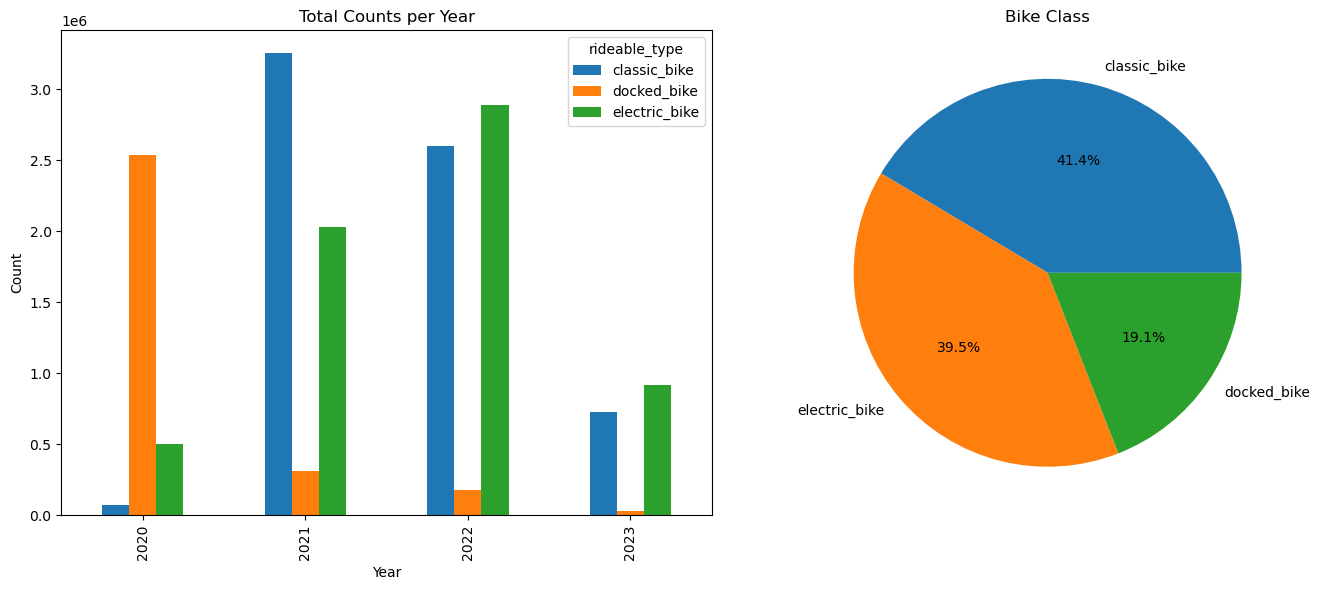

In [27]:
# create a pivot
df_bike_type = df.pivot_table(values='total_time', index='year', columns='rideable_type', aggfunc='size')

# sub plot formula
fig, axes = plt.subplots(nrows=1, ncols=2, figsize=(14, 6))

# Bar plot
plt.subplot(1, 2, 1)
df_bike_type.plot(kind='bar', ax=axes[0])
plt.xlabel('Year')
plt.ylabel('Count')
plt.title('Total Counts per Year')

# Pie plot
plt.subplot(1, 2, 2)
df['rideable_type'].value_counts().plot(kind='pie', title='Bike Class', ylabel='', autopct='%1.1f%%', ax=axes[1])

plt.tight_layout()
plt.show()


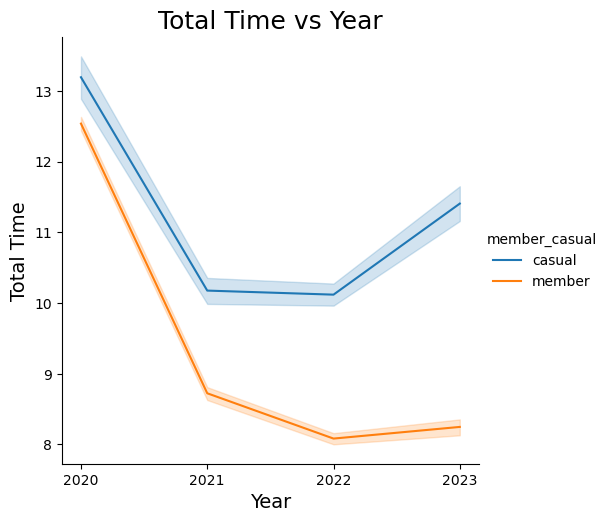

In [31]:
### total time spent on bikes through the year
df['year'] = df['year'].astype(int)  # Convert 'year' column to integers

df = df.sort_values('year')  # Sort the DataFrame by 'year'

sns.relplot(data=df, x="year", y="total_time", hue='member_casual', kind="line")
plt.xticks(df['year'].unique())  # Set x-ticks using unique 'year' values
plt.title("Total Time vs Year", fontsize=18)
plt.xlabel("Year", fontsize=14)
plt.ylabel("Total Time", fontsize=14)
plt.show()

<AxesSubplot:title={'center':'Total Time vs Month'}, xlabel='Month', ylabel='Total Time'>

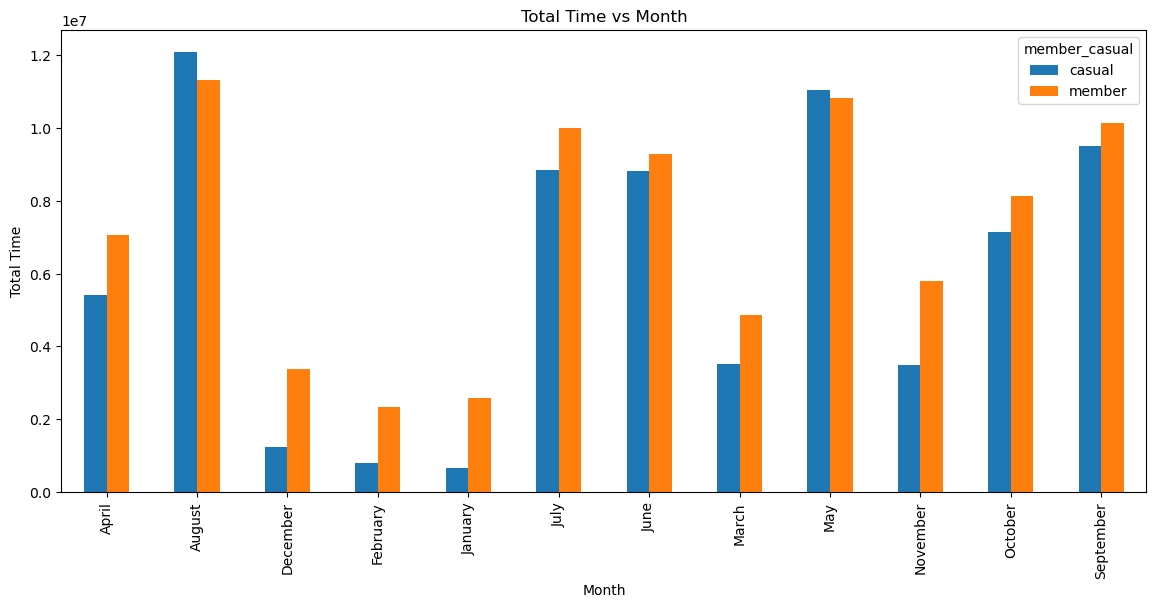

In [29]:
# Create the bar plot
ne= df.pivot_table(values='total_time', index='month',
                    columns='member_casual', aggfunc='sum')
ne.plot(title="Total Time vs Month", kind= 'bar', ylabel = 'Total Time',
        xlabel = 'Month',figsize= (14,6))

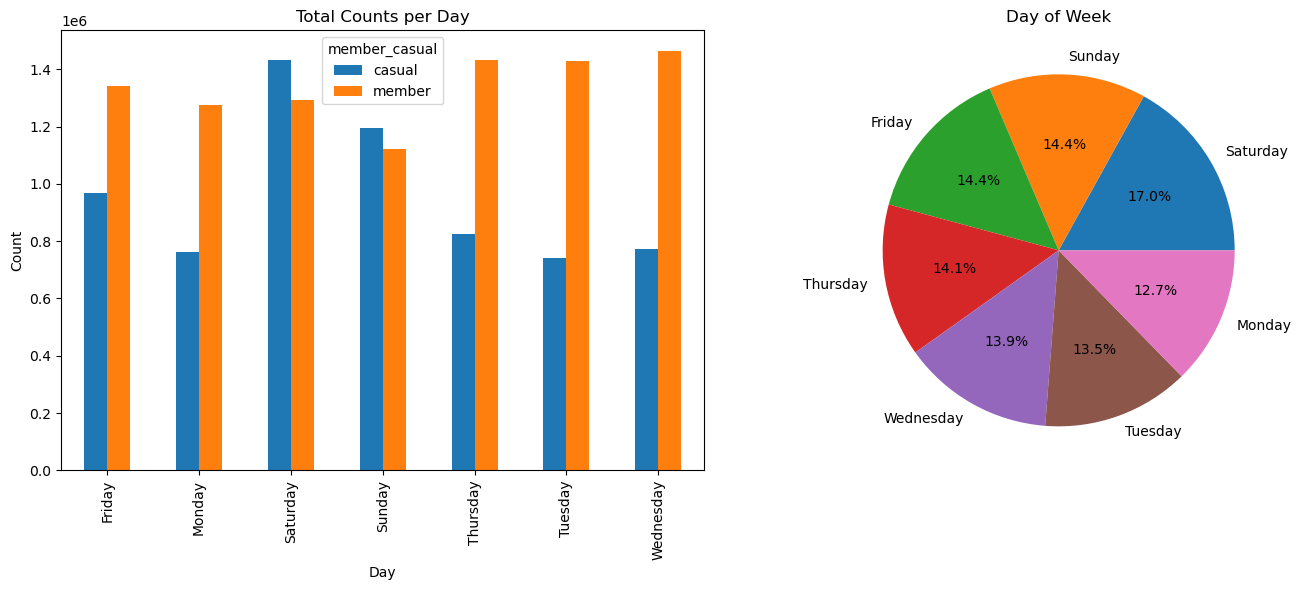

In [30]:
# Create the bar plot
df_subset = df.pivot_table(values='total_time', index='day_of_week', columns='member_casual', aggfunc='size')

fig, axes = plt.subplots(nrows=1, ncols=2, figsize=(14, 6))

# Bar plot
plt.subplot(1, 2, 1)
df_subset.plot(kind='bar', ax=axes[0])
plt.xlabel('Day')
plt.ylabel('Count')
plt.title('Total Counts per Day')

# Pie plot
plt.subplot(1, 2, 2)
df['day_of_week'].value_counts().plot(kind='pie', title='Day of Week', ylabel='', autopct='%1.1f%%', ax=axes[1])

plt.tight_layout()
plt.show()

## Conclusion 

### Key Takeaways 

* Weather has a direct impact on bike usage. The winter season has shown little activity in both customer segments, although August and May exhibit high activity for our targeted group, casual riders. This may be due to travelers arriving during this season. 

* Between 2020-2021 there was a sharp decline in demand, most likely due to COVID-19. The line graph illustrates the interest of casual riders, showing consistent usage after 2021, meanwhile, member usage declined. After 2022 we see a steep incline in bike use for casual riders as the positive trend head toward 2024. 

* Data suggests that casual riders tend to have higher demand on the weekends, while members are more likely to use bikes during the weekdays by a significant difference. The stakeholder mentioned 30% of cyclists utilize bikes for work travel. Given that the company is based in Chicago, it can be assumed that most casual riders are tourists given the high demand during the weekends. 

* The type of bike plays a huge role in customer mobility and convenience. Electric-type bikes are on the rise, slowly taking over the classic bike. Electric bikes are great for the market pool, as they can cater to a diverse population, and enables access to those who can't operate a standard bike with pedals. 

### Recommendations 

The business objective was to find ways to convert casual riders into members.

1. Winter serves as the company's least active season. This can be an opportunity to allocate business expenses toward marketing for a promotion that will take place during the spring season. In May we see higher traffic within the casual rider base, so an incentive to sign up should be promoted and prioritized during this window.

2. As mentioned before pricing plans are as follows; single-ride passes, full-day passes, and annual memberships. Weekends are the most active for casual riders, and on average tourists typically spend at least 3-5 days in Chicago. Price flexibility is possible within this company, so prices can be more appealing for customers who intend on having memberships but will have short-term use for the product. A minimal rate increase, depending on the activity within a given area, can be applied to one-time users. In contrast, more flexible rates will be advertised for those interested in becoming members.

3. Target the most popular product. Electric motors are becoming the latest trend in transportation and will continue to serve as a convenience to customers with disabilities. Price flexibility in a form of a discount can be advertised to casual riders in demand for electric bikes. A deal can make membership more appealing to travelers. The most popular start and endpoints have been discovered, electric bikes can be stored at these sites to soothe increasing demand. 
